In [31]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Specify the file path
file_path = '/content/drive/MyDrive/my_data/customer_data.csv'

# Load data
df = pd.read_csv(file_path)

In [38]:
from google.colab import files
uploaded = files.upload()

Saving customer_data.csv to customer_data (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['customer_data.csv']))

In [40]:
# Display first 5 lines
print(df.head())

# Check data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Remove or fill in missing values
df = df.dropna()  # You can remove missing data
# or df.fillna(value) you can fill in missing data with a value

  Customer_ID;Name;Age;Gender;Location;Product_Category;Product_Name;Price;Purchase_Frequency;Total_Spent;Date;Purchased_Next;
0  1;John Doe;29;Male;New York;Electronics;Laptop...                                                                          
1  2;Jane Smith;34;Female;California;Clothing;T-s...                                                                          
2  3;Mark Lee;42;Male;Texas;Electronics;Smartphon...                                                                          
3  4;Linda Green;25;Female;Florida;Home;Vacuum Cl...                                                                          
4  5;James Brown;37;Male;New York;Clothing;Jeans;...                                                                          
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 1 columns):
 #   Column                                                                                                                        Non-N

In [41]:
import pandas as pd

# Specify the correct separator when rereading the data
df = pd.read_csv('customer_data.csv', sep=';')

# Check columns
print(df.columns)

Index(['Customer_ID', 'Name', 'Age', 'Gender', 'Location', 'Product_Category',
       'Product_Name', 'Price', 'Purchase_Frequency', 'Total_Spent', 'Date',
       'Purchased_Next', 'Unnamed: 12'],
      dtype='object')


In [42]:
# General statistics
print(df.describe())

# Average and median values ​​for metrics like Age, Spending and Purchase Frequency
print("Average Age:", df['Age'].mean())
print("Average Spending:", df['Total_Spent'].mean())
print("Average Purchase Frequency:", df['Purchase_Frequency'].mean())

       Customer_ID        Age        Price  Purchase_Frequency  Total_Spent  \
count    59.000000  59.000000    59.000000           59.000000    59.000000   
mean     30.169492  33.559322   240.328983            6.016949   989.855085   
std      17.423876   6.460146   293.637802            3.277360  1158.163559   
min       1.000000  23.000000    14.990000            2.000000   139.860000   
25%      15.500000  29.000000    34.990000            4.000000   239.900000   
50%      30.000000  32.000000    99.990000            5.000000   599.970000   
75%      44.500000  38.000000   299.990000            7.500000   999.980000   
max      60.000000  50.000000  1299.990000           15.000000  4999.950000   

       Purchased_Next  Unnamed: 12  
count       59.000000          0.0  
mean         0.694915          NaN  
std          0.464396          NaN  
min          0.000000          NaN  
25%          0.000000          NaN  
50%          1.000000          NaN  
75%          1.000000        

In [43]:
# Age segmentation
bins = [0, 25, 35, 45, 100]
labels = ['18-25', '26-35', '36-45', '46+']
df['Age_Segment'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Number of customers in each age segment
print(df['Age_Segment'].value_counts())

Age_Segment
26-35    35
36-45    18
18-25     4
46+       2
Name: count, dtype: int64


In [44]:
# Spending analysis by product categories
category_spending = df.groupby('Product_Category')['Total_Spent'].mean()
print(category_spending)

# Comparison of product categories and purchasing frequency
category_frequency = df.groupby('Product_Category')['Purchase_Frequency'].mean()
print(category_frequency)

Product_Category
Clothing        318.100909
Electronics    2005.835294
Furniture       929.964000
Home            682.612000
Toys            210.720000
Name: Total_Spent, dtype: float64
Product_Category
Clothing        8.090909
Electronics     4.705882
Furniture       3.600000
Home            5.466667
Toys           11.333333
Name: Purchase_Frequency, dtype: float64


In [45]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check the conversion process
print(df['Date'].head())

0   2024-01-15
1   2024-01-17
2   2024-01-18
3   2024-02-10
4   2024-02-14
Name: Date, dtype: datetime64[ns]


<ipython-input-45-4bf8f0c31b7e>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [46]:
# Total monthly spending
df['Month'] = df['Date'].dt.to_period('M')
monthly_spending = df.groupby('Month')['Total_Spent'].sum()
print(monthly_spending)

# Monthly purchasing frequency
monthly_frequency = df.groupby('Month')['Purchase_Frequency'].sum()
print(monthly_frequency)

Month
2024-01     6739.80
2024-02     2579.75
2024-03    15084.18
2024-04    13889.03
2024-05    10789.06
2024-06     9319.63
Freq: M, Name: Total_Spent, dtype: float64
Month
2024-01    20
2024-02    25
2024-03    82
2024-04    97
2024-05    94
2024-06    37
Freq: M, Name: Purchase_Frequency, dtype: int64


In [47]:
# Separate repeat buyers and non-purchasers using the Purchased_Next column
repeat_buyers = df[df['Purchased_Next'] == 1]
non_repeat_buyers = df[df['Purchased_Next'] == 0]

# Difference in spending between repeat shoppers and non-repurchasers
print("Average Expenditure of Repeat Customers:", repeat_buyers['Total_Spent'].mean())
print("Average Expenditure of Customers Who Do Not Shop Again:", non_repeat_buyers['Total_Spent'].mean())

Average Expenditure of Repeat Customers: 923.9614634146341
Average Expenditure of Customers Who Do Not Shop Again: 1139.9461111111113


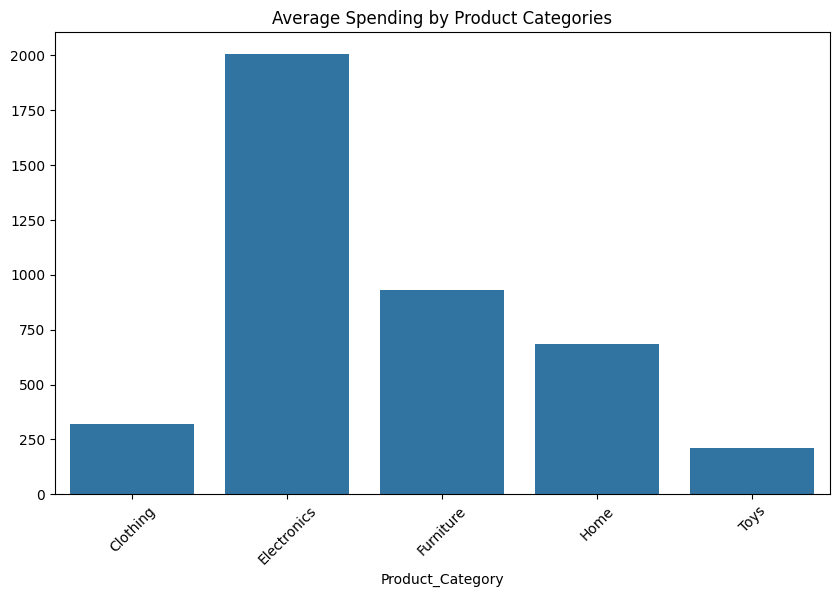

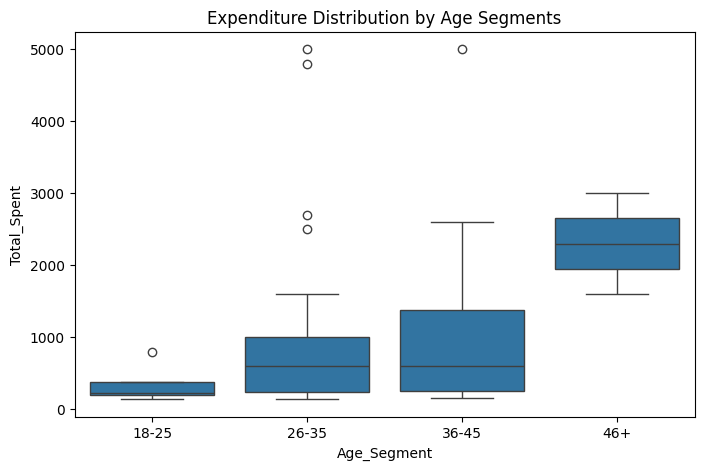

In [48]:
# Spending distribution by product categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_spending.index, y=category_spending.values)
plt.title('Average Spending by Product Categories')
plt.xticks(rotation=45)
plt.show()

# Average spend by age segment
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age_Segment', y='Total_Spent', data=df)
plt.title('Expenditure Distribution by Age Segments')
plt.show()

In [49]:
# Save CLV and segment information to a new CSV file
df.to_csv('customer_analysis_results.csv', index=False)